In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

def visualize_vector_heatmap(vector, title="Feature Heatmap"):
    """
    将一个 1D 向量（长度为 512）以热图形式可视化。
    参数：
        - vector: torch.Tensor 或 np.ndarray，形状为 (512,)
    """
    if isinstance(vector, torch.Tensor):
        vector = vector.detach().cpu().numpy()
    
    # 将 512 维向量 reshape 成二维形状，比如 32x16 或 16x32（按需变）
    heatmap = vector.reshape(1, 512)

    plt.figure(figsize=(20, 1))
    sns.heatmap(heatmap, cmap="viridis", annot=False)
    plt.title(title)
    plt.xlabel("Feature Index")
    plt.ylabel("Channel")
    plt.tight_layout()
    plt.show()


In [40]:
import sys
import os
import sys
import os

# 添加父目录到 sys.path
parent_path = os.path.abspath("..")  # 或者指定某一级路径
if parent_path not in sys.path:
    sys.path.append(parent_path)
    
from get_model import build_clip_model
from model.Clip import tokenize  # 分词器
import torch
import tqdm
import numpy as np
import pandas as pd
import random
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim

config_path = "/root/NP-CLIP/XTrainer/config/CLS/CLS-Clip-VitB32-ep10-Caltech101-AdamW.yaml"

Clip_model = build_clip_model(config_path=config_path) # 加载CLIP模型

# 设置随机种子
def set_seed(seed):
    """设置随机种子"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)


def extract_sentence_features(sentence:str):
    """
    提取单个句子的CLIP文本特征
    
    参数：
        - sentence: 输入句子(str)
        
    返回：
        - text_features: CLIP文本编码器的输出文本特征(EOS特征) [embed_dim]
        - level_text_features_list: CLIP文本编码器每一层的EOS特征 [num_layers, embed_dim]
    """
    with torch.no_grad():  # 关闭梯度计算
        tokenized_text = tokenize(sentence) # [num_classes=1, context_length]
        tokenized_text = tokenized_text.to(Clip_model.device) # [num_classes=1, context_length]
        text_features, level_text_features_list = Clip_model.encode_text(tokenized_text) # [num_classes=1, embed_dim]*num_layers
        text_features = text_features.cpu().numpy()[0]
        level_text_features_list = [level_text_features.cpu().numpy()[0] for level_text_features in level_text_features_list]
        return text_features, level_text_features_list # [embed_dim], [embed_dim]*num_layers


def extract_objs_features(objs:list):
    """
    提取单个句子的CLIP文本特征
    
    参数：
        - objs: 对象列表(list)
        
    返回：
        # - objs_features: CLIP文本编码器的输出文本特征(EOS特征) [num_objs, embed_dim]
        - objs_features(list: CLIP文本编码器的输出文本特征(EOS特征) [embed_dim]*num_objs
    """
    objs_features = []
    for obj in objs:
        # text = f"This image shows a {obj}."
        text = f"{obj}"
        feature, _ = extract_sentence_features(text)
        feature = torch.tensor(feature, dtype='float32') # [embed_dim]
        objs_features.append(feature)
    # objs_features = torch.stack(objs_features) # [num_objs, embed_dim]
    return objs_features

Loading model: Clip
正在调用模型构造方法构造模型....
直接调用模型构造方法失败，尝试使用模型的 build_model 方法....


In [41]:
NP = [
        "This image shows a person, but no motorbike is included.", # p:['person']  n:['motorbike']
        "This image features a car, but no knife is present.", # p:['car']  n:['knife']
        "A bus is included, while a car is absent.", # p:['bus']  n:['car']
        "A bird is present in this image, with no person in sight." # p:['bird']  n:['person']
    ]
P = [
        "This image shows a person.",
        "This image features a car.",
        "A bus is included.",
        "A bird is present in this image."
    ]
N = [
        "but no motorbike is included.",
        "but no knife is present.",
        "while a car is absent.",
        "with no person in sight."
    ]

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


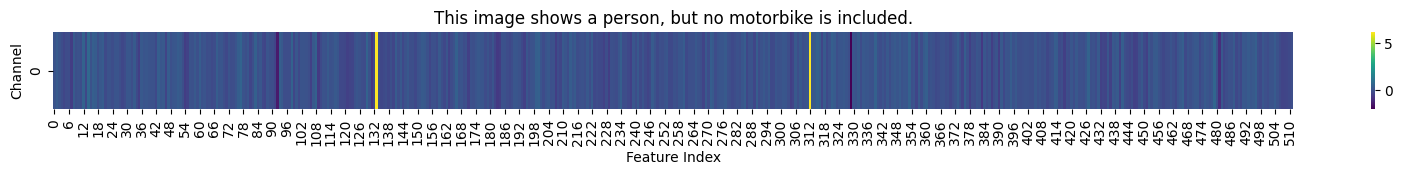

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


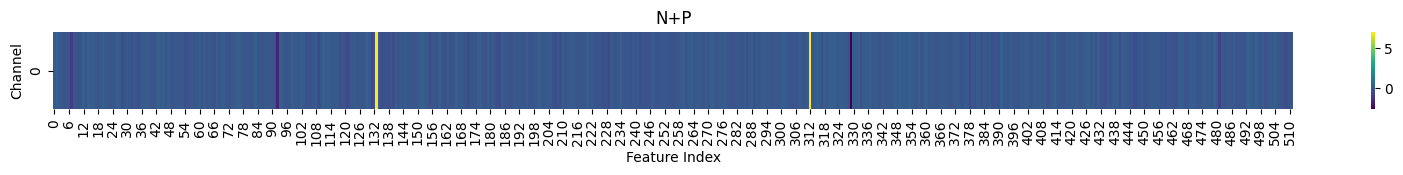

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


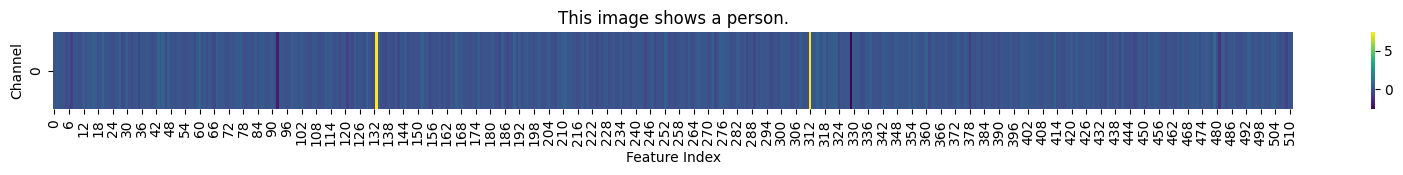

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


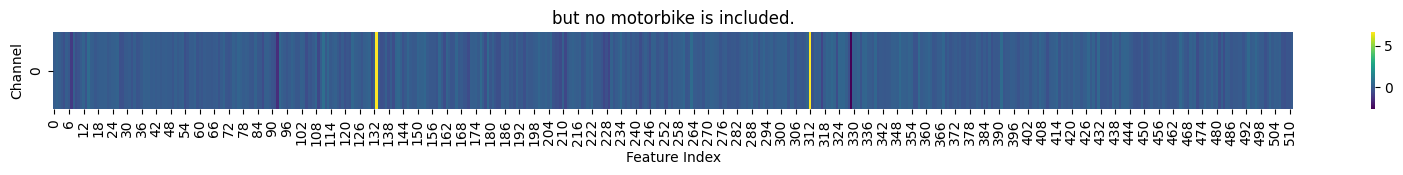

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


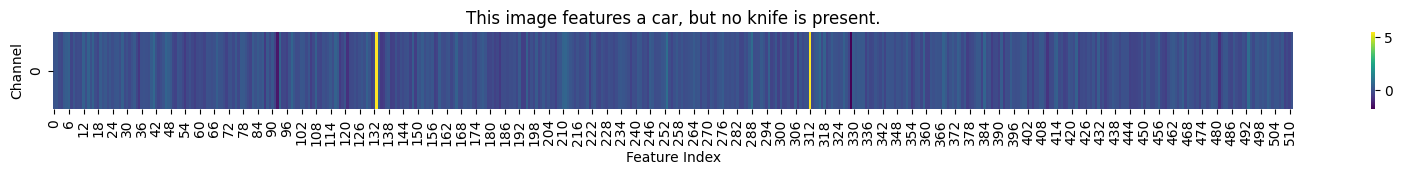

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


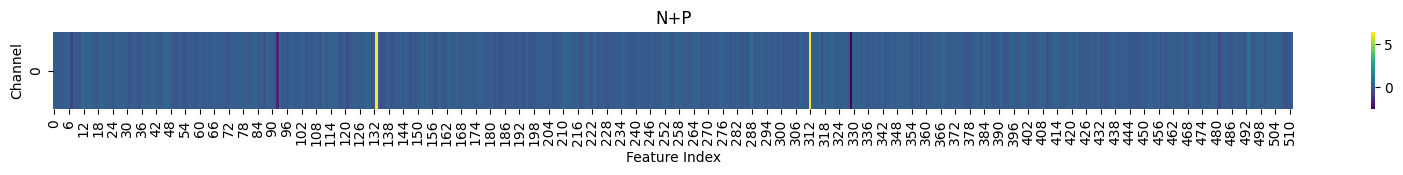

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


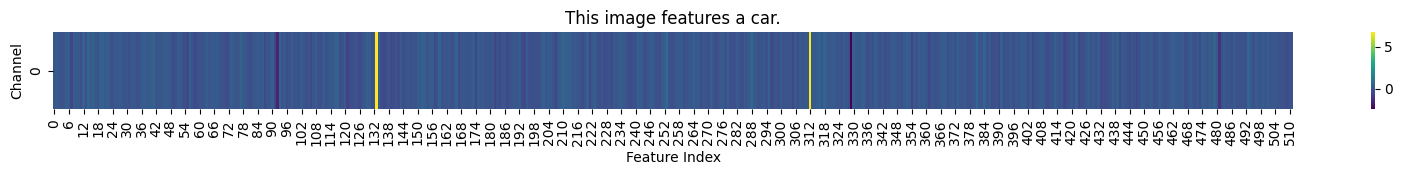

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


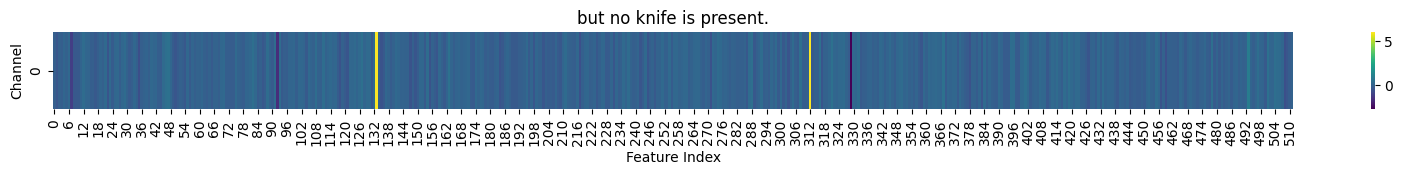

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


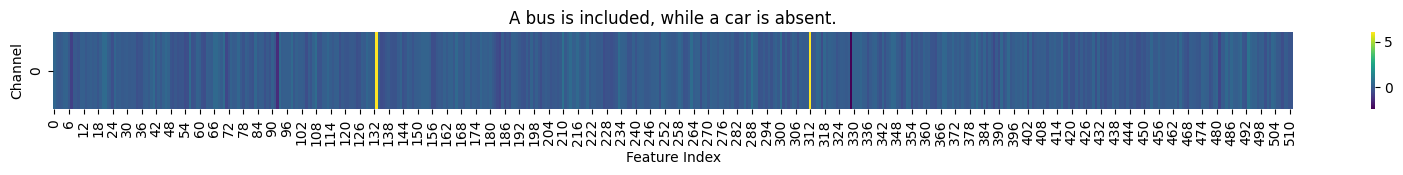

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


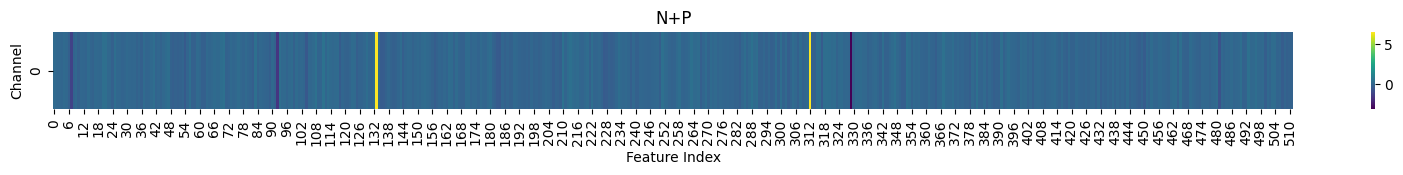

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


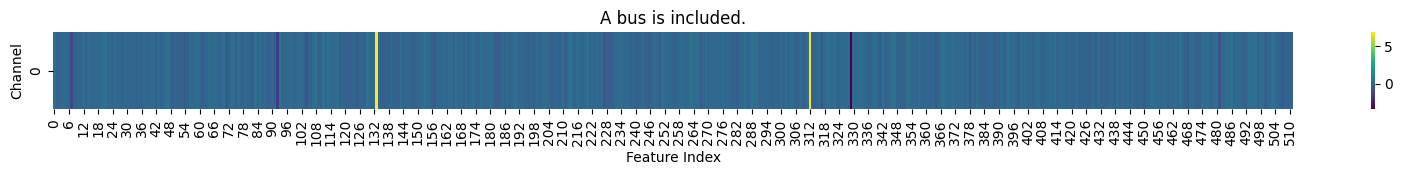

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


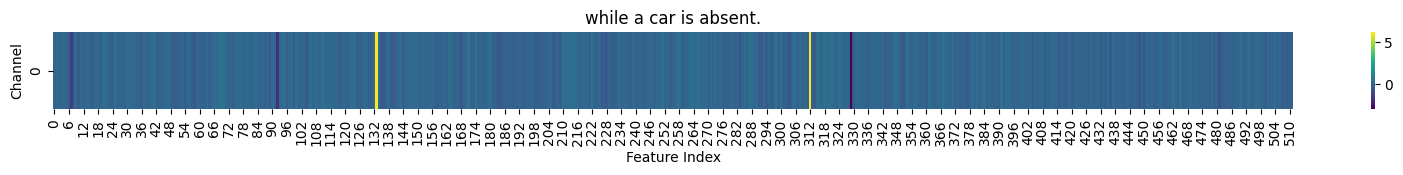

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


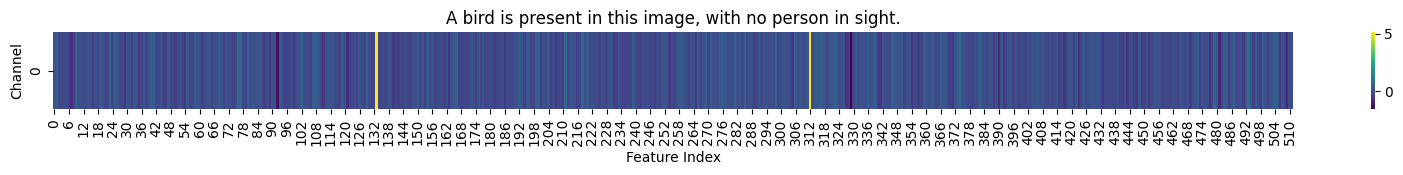

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


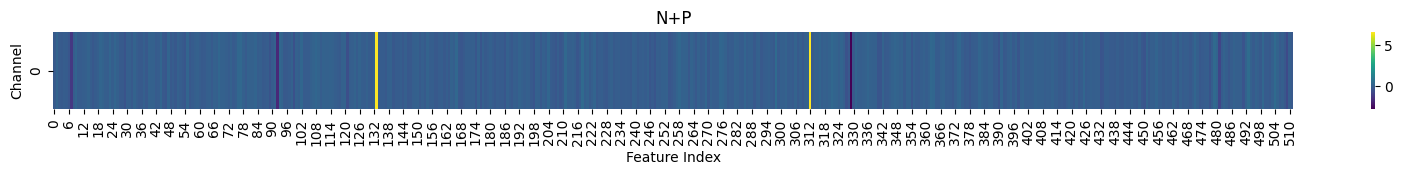

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


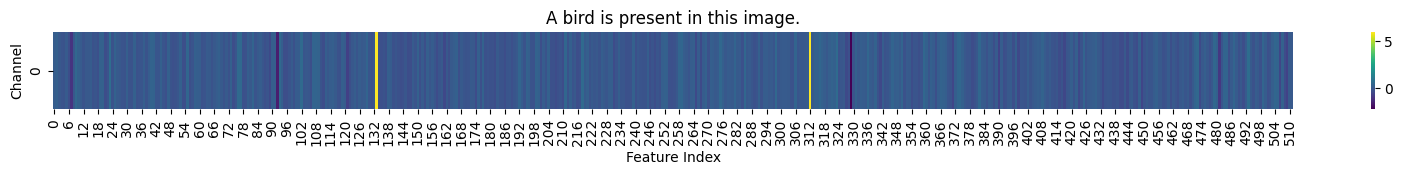

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


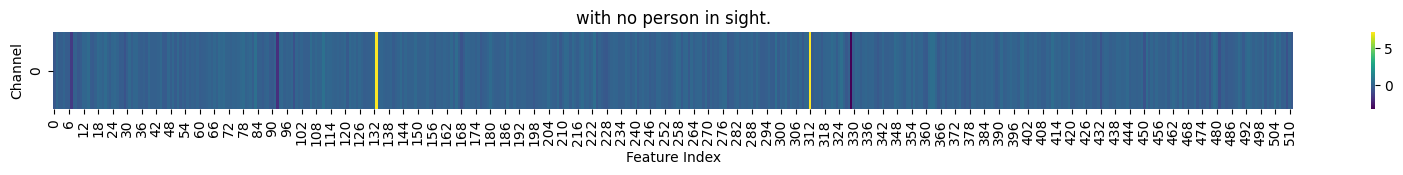

In [42]:
# 使用extract_sentence_features函数提取文本特征
for i in range(len(NP)):
    np_feature, _ = extract_sentence_features(NP[i])
    p_feature, _ = extract_sentence_features(P[i])
    n_feature, _ = extract_sentence_features(N[i])
    # 对比可视化三个特征
    visualize_vector_heatmap(np_feature, title=NP[i])
    visualize_vector_heatmap((p_feature+n_feature)/2, title="N+P")
    visualize_vector_heatmap(p_feature, title=P[i])
    visualize_vector_heatmap(n_feature, title=N[i])
    


In [43]:
OBJ = [
        "This image shows a person.",
        "This image features a car.",
        "This image features a cat.",
        "This image features a dog.",
        "This image features a knife.",
]

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


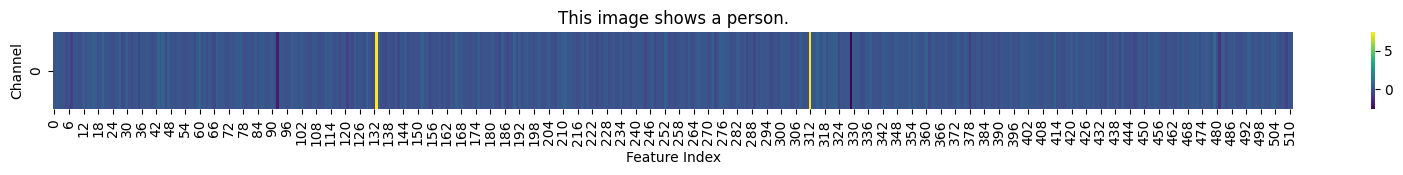

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


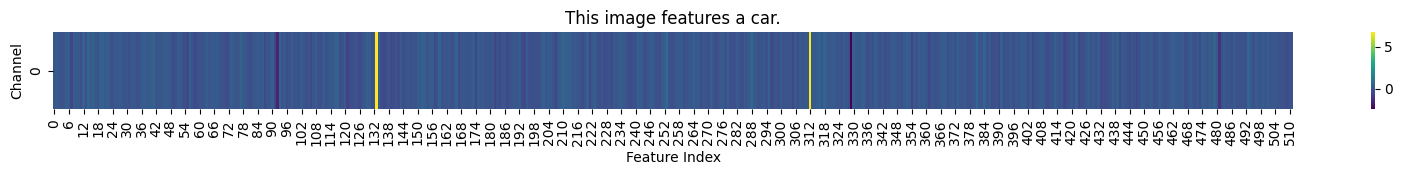

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


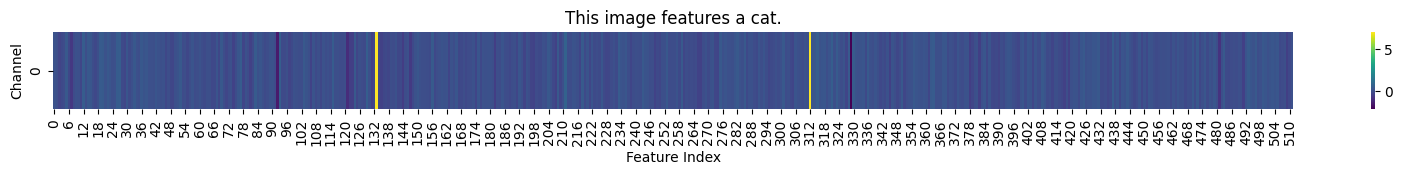

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


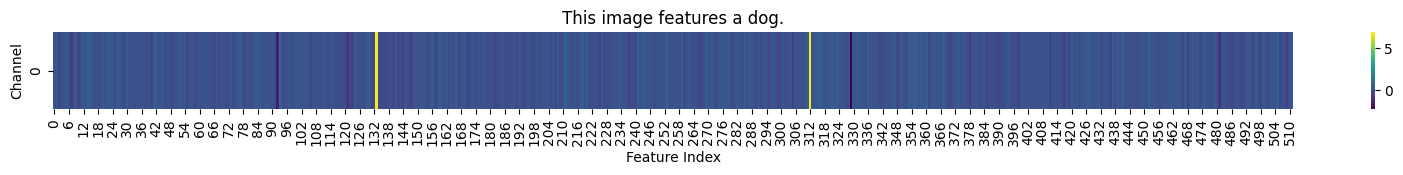

/tmp/ipykernel_514598/3874853378.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


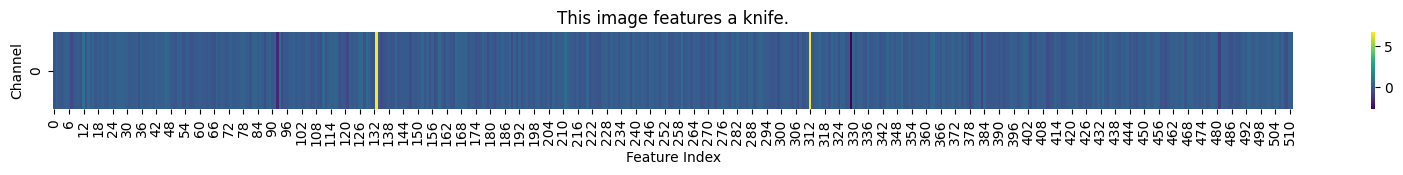

In [44]:
for obj in OBJ:
    np_feature, _ = extract_sentence_features(obj)
    # 对比可视化三个特征
    visualize_vector_heatmap(np_feature, title=obj)